In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../input/all-narendra-modi-tweets-2022-updated/modi.csv")

In [3]:
data.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Narendra Modi,@narendramodi,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jam...,NaN,9,11,11,[],https://twitter.com/narendramodi/status/117554...
1,Narendra Modi,@narendramodi,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarni...",NaN,36,209,267,[],https://twitter.com/narendramodi/status/116729...
2,Narendra Modi,@narendramodi,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendram...,NaN,3,5,5,[],https://twitter.com/narendramodi/status/120151...
3,Narendra Modi,@narendramodi,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the develop...,NaN,3,2,2,[],https://twitter.com/narendramodi/status/124423...
4,Narendra Modi,@narendramodi,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Ai...,NaN,1,1,3,[],https://twitter.com/narendramodi/status/126825...


In [4]:
data.shape

(18724, 11)

In [5]:
data.tail()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
18719,Narendra Modi,@narendramodi,2022-06-15T08:21:51.000Z,Narendra Modi\n@narendramodi\n·\nJun 15,যোগৰ সৌন্দৰ্য্য ইয়াৰ সৰলতাত আছে। প্ৰয়োজন মা...,NaN,58,"1,748","4,320",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153698...
18720,Narendra Modi,@narendramodi,2022-06-14T03:49:47.000Z,Narendra Modi\n@narendramodi\n·\nJun 13,"যোগা হল জ্ঞান, কর্ম আর ভক্তির সঠিক সমাহার।দ্রু...",NaN,85,"1,874","4,923",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153655...
18721,Narendra Modi,@narendramodi,2022-06-13T04:22:35.000Z,Narendra Modi\n@narendramodi\n·\nJun 12,গত কয়েক বছরে যোগা সারা বিশ্বে অসম্ভব জনপ্রিয়...,NaN,85,"1,441","4,366",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153620...
18722,Narendra Modi,@narendramodi,2022-06-14T03:50:27.000Z,Narendra Modi\n@narendramodi\n·\nJun 13,"যোগ জ্ঞান, কৰ্ম আৰু ভক্তিৰ এক নিখুঁত মিশ্ৰণ। ...",NaN,74,"1,837","4,720",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153655...
18723,Narendra Modi,@narendramodi,2022-06-13T04:23:46.000Z,Narendra Modi\n@narendramodi\n·\nJun 12,বিগত কিছু বছৰত যোগে বিশ্বব্যাপী যথেষ্ট জনপ্ৰিয...,NaN,62,"1,486","4,092",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153620...


In [6]:
data.isnull().sum()

UserScreenName        0
UserName              0
Timestamp             0
Text                  0
Embedded_text         0
Emojis            18568
Comments            215
Likes                37
Retweets             61
Image link            0
Tweet URL             0
dtype: int64

In [7]:
data.dtypes

UserScreenName    object
UserName          object
Timestamp         object
Text              object
Embedded_text     object
Emojis            object
Comments          object
Likes             object
Retweets          object
Image link        object
Tweet URL         object
dtype: object

In [8]:
dt = data.Comments.values

In [9]:
tp = dt.astype("str")

In [10]:
for i in range(dt.shape[0]):
    if dt[i] is np.nan:
        tp[i] = "610"

In [11]:
te = np.array(list(map(lambda x : x.replace("," , "") , tp)))

In [12]:
for i in range(te.shape[0]):
    if not str(te[i]).isnumeric():
        te[i] = int(float(str(te[i]).replace("K" , "")) * 1000)

In [13]:
te = te.astype("int")

In [14]:
te.shape , data.shape

((18724,), (18724, 11))

In [15]:
data.drop(["Comments" , "UserScreenName" , "UserName" , "Tweet URL" , "Image link" , 
          "Emojis"] , axis = 1 , inplace = True)

In [16]:
data.head()

,Timestamp,Text,Embedded_text,Likes,Retweets
0,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jam...,11,11
1,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarni...",209,267
2,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendram...,5,5
3,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the develop...,2,2
4,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Ai...,1,3


In [17]:
data["num_comments"] = te

In [18]:
data.iloc[15031].Embedded_text

'This Sunday, thinking of giving up my social media accounts on Facebook, Twitter, Instagram & YouTube. Will keep you all posted.\n96.3K\n76K\n184K'

In [19]:
all_comments = data.num_comments.values

In [20]:
(np.sort(all_comments)[-5:].sum() / np.sum(all_comments))*100

2.191016691340436

In [21]:
np.sort(all_comments)[-5:]

array([29300, 29900, 37800, 56700, 96300])

In [22]:
pd.set_option('display.max_colwidth', None)
data[data.num_comments >= 29300].Embedded_text

13435                                    Attack on CRPF personnel in Pulwama is despicable. I strongly condemn this dastardly attack. The sacrifices of our brave security personnel shall not go in vain. The entire nation stands shoulder to shoulder with the families of the brave martyrs. May the injured recover quickly.\n29.9K\n39.4K\n117.2K
13588    Your Chowkidar is standing firm & serving the nation.\n\nBut, I am not alone.\n\nEveryone who is fighting corruption, dirt, social evils is a Chowkidar.\n\nEveryone working hard for the progress of India is a Chowkidar.\n\nToday, every Indian is saying-#MainBhiChowkidar\nTake The Pledge\nTweet #MainBhiChowkidar\n29.3K\n55.8K\n144.2K
15031                                                                                                                                                                                                This Sunday, thinking of giving up my social media accounts on Facebook, Twitter, Instagram & YouTube. Will keep yo

In [23]:
#number of times he takes of Pakistan
count = 0
for i in range(data.shape[0]):
    if "Pakistan" in data.iloc[i].Embedded_text:
        print(data.iloc[i].Embedded_text.split("\n")[0])
        print("")

Who will save us from the antics of Pakistan? Despite Mumbai attacks, Congress still asleep.

In Pakistan, the Taliban is inflicting its tyranny and in Pakistan, Sikhs are being persecuted, Sardars are being persecuted.

Rajasthan and Gujarat share a border with Pakistan and the Taliban is knocking at our door. Take a look at their election manifesto.

Brothers and sisters, you’ll must be watching the news coming out from Pakistan on television.

that persecution is once again being inflicted by the Taliban on Pakistan’s soil. Prime Minister, tell me what has your government done?

Just to please Pakistan, US has unlocked the ways for all the 26/11 'Mumbai attack' terrorists to be free of guilt

Thanks to a Pakistani delegation for presenting a priceless memento whose roots were blessed by Gandhiji over 75yrs ago http://bit.ly/somS9o

USA should clear its stand on terrorism from across Pakistan border...told to a delegation from US http://bit.ly/x2nlk2

Congratulations to Team India fo

In [24]:
#number of times he takes of Gandhi
count = 0
for i in range(data.shape[0]):
    if "Rahul" in data.iloc[i].Embedded_text:
        print(data.iloc[i].Embedded_text.split("\n")[0])
        print("")

Mr. Rahul Gandhi talks of respect for Vidhan Sabha but his own attendance in Lok Sabha between May 2011-May 2012 was 24 out of 85 sittings!

If Rahul Baba is walking on Gandhiji's path, why is Bapu's 1 wish incomplete - to disband Congress after Independence? http://nm4.in/124G2oL

Instead of talking development, Mr. Rahul Gandhi who does not even know the names of Gujarat’s districts is teaching Gujarat history.

Rahul Baba's hypocrisy on full show. Says only 1 voice is heard in Guj. I ask - what about the 5000 schemes named after his family?

PM talks of happily working under Rahul Gandhi's leadership next year! Wasn't he doing the same all these years?Misleading the nation again?

Wishing the Congress Vice President, Shri Rahul Gandhi a Happy Birthday. I pray for his good health & long life. @OfficeOfRG

Birthday wishes to the Congress VP, Shri Rahul Gandhi. May he be blessed with a long and healthy life. @OfficeOfRG

Birthday greetings to the Congress Vice President, Shri Rahul Gan

In [25]:
data.head()

,Timestamp,Text,Embedded_text,Likes,Retweets,num_comments
0,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jamboree-2009. Watch live webcast at 6.00pm today on www.narendramodi.in\n9\n11\n11,11,11,9
1,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarnim Jayanti Yatra\n36\n209\n267",209,267,36
2,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendramodi.in launched with many interactive features to connect you directly with CM.\n3\n5\n5,5,5,3
3,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the development of Gujarat: Chief Minister http://tinyurl.com/b6ltru\n3\n2\n2,2,2,3
4,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Aid-Package” for the unemployed Diamond-Artisans http://tinyurl.com/cjk3vd\n1\n1\n3,1,3,1


In [26]:
data.isnull().sum()

Timestamp         0
Text              0
Embedded_text     0
Likes            37
Retweets         61
num_comments      0
dtype: int64

In [27]:
on = data.Likes.values
for i in range(on.shape[0]):
    if on[i] is np.nan:
        on[i] = "2406"
on = on.astype("str")
for i in range(on.shape[0]):
    on[i] = on[i].replace("," , "")
    if "K" in on[i]:
        on[i] = int(float(on[i].replace("K" , ""))*1000)

In [28]:
data["num_likes"] = on.astype("int")

In [29]:
data.head()

,Timestamp,Text,Embedded_text,Likes,Retweets,num_comments,num_likes
0,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jamboree-2009. Watch live webcast at 6.00pm today on www.narendramodi.in\n9\n11\n11,11,11,9,11
1,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarnim Jayanti Yatra\n36\n209\n267",209,267,36,209
2,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendramodi.in launched with many interactive features to connect you directly with CM.\n3\n5\n5,5,5,3,5
3,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the development of Gujarat: Chief Minister http://tinyurl.com/b6ltru\n3\n2\n2,2,2,3,2
4,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Aid-Package” for the unemployed Diamond-Artisans http://tinyurl.com/cjk3vd\n1\n1\n3,1,3,1,1


In [30]:
data.drop("Likes" , axis = 1 , inplace = True)

In [31]:
data.head()

,Timestamp,Text,Embedded_text,Retweets,num_comments,num_likes
0,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jamboree-2009. Watch live webcast at 6.00pm today on www.narendramodi.in\n9\n11\n11,11,9,11
1,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarnim Jayanti Yatra\n36\n209\n267",267,36,209
2,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendramodi.in launched with many interactive features to connect you directly with CM.\n3\n5\n5,5,3,5
3,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the development of Gujarat: Chief Minister http://tinyurl.com/b6ltru\n3\n2\n2,2,3,2
4,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Aid-Package” for the unemployed Diamond-Artisans http://tinyurl.com/cjk3vd\n1\n1\n3,3,1,1


In [32]:
dr = data.Retweets.values
tw = []
for i in range(dr.shape[0]):
    jh = None
    if dr[i] is np.nan:
        continue
    dr[i] = dr[i].replace("," , "")
    if "K" in dr[i]:
        jh = int(float(str(dr[i]).replace("K" , "")) * 1000)
    if jh is None:
        tw.append(int(dr[i]))
    else:
        tw.append(jh)

In [33]:
np.mean(tw) #11727

11727.563146332315

In [34]:
sd = data.Retweets.values
for i in range(sd.shape[0]):
    if sd[i] is np.nan:
        sd[i] = "11727"
        continue
    sd[i] = sd[i].replace("," , "")
    sd[i] = int(float(sd[i].replace("K" , "")) * 1000)


In [35]:
data["num_retweets"] = sd.astype("int")

In [36]:
data.head()

,Timestamp,Text,Embedded_text,Retweets,num_comments,num_likes,num_retweets
0,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jamboree-2009. Watch live webcast at 6.00pm today on www.narendramodi.in\n9\n11\n11,11000,9,11,11000
1,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarnim Jayanti Yatra\n36\n209\n267",267000,36,209,267000
2,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendramodi.in launched with many interactive features to connect you directly with CM.\n3\n5\n5,5000,3,5,5000
3,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the development of Gujarat: Chief Minister http://tinyurl.com/b6ltru\n3\n2\n2,2000,3,2,2000
4,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Aid-Package” for the unemployed Diamond-Artisans http://tinyurl.com/cjk3vd\n1\n1\n3,3000,1,1,3000


In [37]:
data.drop("Retweets" , axis = 1 , inplace = True)

In [38]:
data.head()

,Timestamp,Text,Embedded_text,num_comments,num_likes,num_retweets
0,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jamboree-2009. Watch live webcast at 6.00pm today on www.narendramodi.in\n9\n11\n11,9,11,11000
1,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarnim Jayanti Yatra\n36\n209\n267",36,209,267000
2,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendramodi.in launched with many interactive features to connect you directly with CM.\n3\n5\n5,3,5,5000
3,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the development of Gujarat: Chief Minister http://tinyurl.com/b6ltru\n3\n2\n2,3,2,2000
4,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Aid-Package” for the unemployed Diamond-Artisans http://tinyurl.com/cjk3vd\n1\n1\n3,1,1,3000


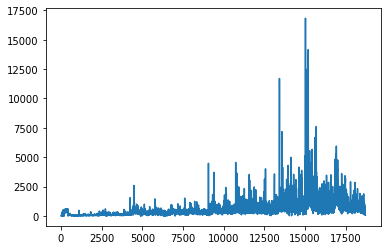

In [39]:
plt.plot(data.num_comments.rolling(7 , center = True).mean())

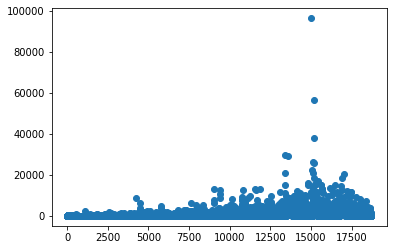

In [40]:
plt.scatter(range(data.num_comments.shape[0]) , data.num_comments)

In [41]:
n_tw = data.num_comments.values
tl = n_tw[n_tw < 15000]

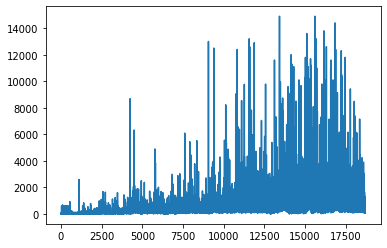

In [42]:
plt.plot(tl)

In [43]:
ts = data.copy()

In [44]:
ts = ts.set_index("Timestamp")

In [45]:
ts.index = pd.to_datetime(ts.index)

In [46]:
data_columns = ["num_comments" , "num_likes" , "num_retweets"]
weekly_mean = ts[data_columns].resample('W').mean()

In [47]:
weekly_mean.head()

,num_comments,num_likes,num_retweets
Timestamp,,,
2009-02-01 00:00:00+00:00,36.0,209.0,267000.0
2009-02-08 00:00:00+00:00,9.0,11.0,11000.0
2009-02-15 00:00:00+00:00,3.0,5.0,5000.0
2009-02-22 00:00:00+00:00,NaN,NaN,NaN
2009-03-01 00:00:00+00:00,3.0,2.0,2000.0


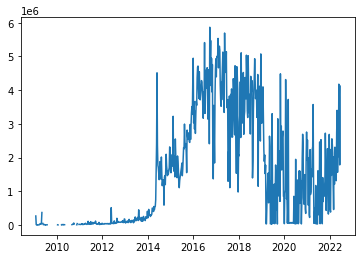

In [48]:
plt.plot(weekly_mean.num_retweets)

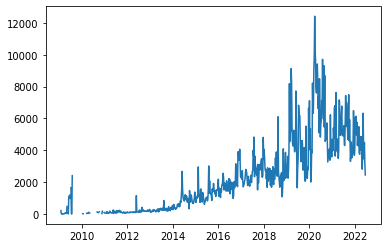

In [49]:
plt.plot(weekly_mean.num_likes)

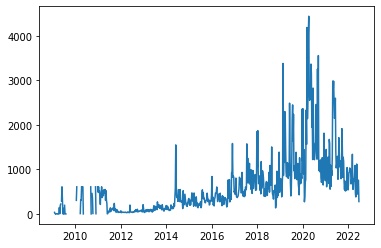

In [50]:
plt.plot(weekly_mean.num_comments)

In [51]:
data_columns = ["num_comments" , "num_likes" , "num_retweets"]
monthly_mean = ts[data_columns].resample('M').mean()

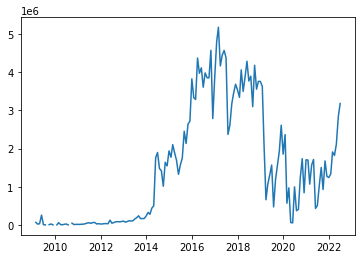

In [52]:
plt.plot(monthly_mean.num_retweets)

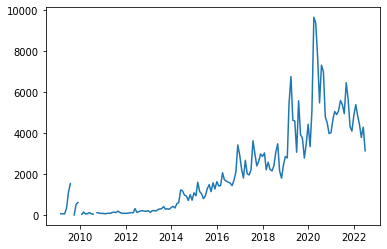

In [53]:
plt.plot(monthly_mean.num_likes)

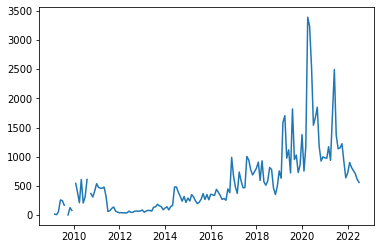

In [54]:
plt.plot(monthly_mean.num_comments)

In [55]:
data_columns = ["num_comments" , "num_likes" , "num_retweets"]
yearly_mean = ts[data_columns].resample('Y').mean()

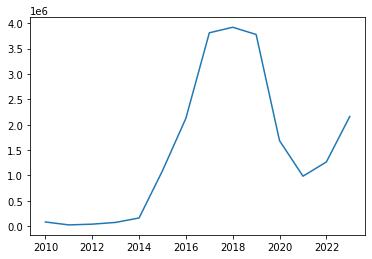

In [56]:
plt.plot(yearly_mean.num_retweets)

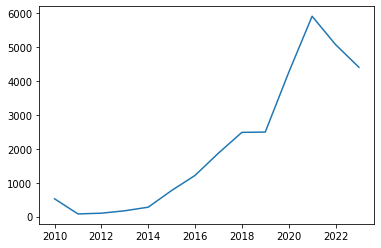

In [57]:
plt.plot(yearly_mean.num_likes)

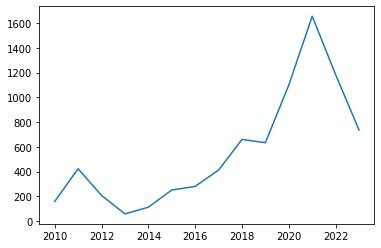

In [58]:
plt.plot(yearly_mean.num_comments)

In [59]:
data_columns = ["num_comments" , "num_likes" , "num_retweets"]
yearly_count = ts[data_columns].resample('Y').count()

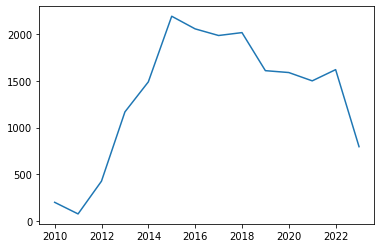

In [60]:
plt.plot(yearly_count.num_retweets)

In [61]:
args = np.argwhere((ts["num_comments"].resample('M').count() == 0).values)
a , b , c = ts.resample('M').count().index[args]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [62]:
#ts.resample('M').count().loc[a]

In [63]:
ts.resample('M').count().loc["2009"]

,Text,Embedded_text,num_comments,num_likes,num_retweets
Timestamp,,,,,
2009-02-28 00:00:00+00:00,4,4,4,4,4
2009-03-31 00:00:00+00:00,7,7,7,7,7
2009-04-30 00:00:00+00:00,63,63,63,63,63
2009-05-31 00:00:00+00:00,51,51,51,51,51
2009-06-30 00:00:00+00:00,40,40,40,40,40
2009-07-31 00:00:00+00:00,22,22,22,22,22
2009-08-31 00:00:00+00:00,0,0,0,0,0
2009-09-30 00:00:00+00:00,1,1,1,1,1
2009-10-31 00:00:00+00:00,5,5,5,5,5


In [64]:
ts.Embedded_text.sample(10)

Timestamp
2021-10-02 05:53:25+00:00                                                                                                                                                                                                                                                                                                                                                                   Interacting with Gram Panchayats and Pani Samitis across India.\nNarendra Modi\n@narendramodi\nInteracting with Gram Panchayats and Pani Samitis across India.\n728\n4,008\n16.3K
2014-04-23 16:38:32+00:00                                                                                                                                                                                                                                                                                                                                                                                                      'Jod-tod' politic

In [65]:
ts["tweet_len"] = ts.Embedded_text.apply(lambda x : len(x))

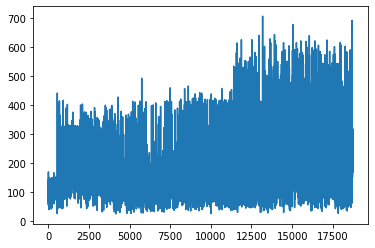

In [66]:
plt.plot(ts["tweet_len"].values)

In [67]:
monthly_tweet_mean_len = ts["tweet_len"].resample('M').mean()

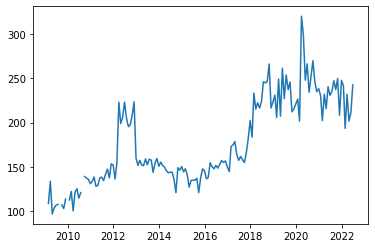

In [68]:
plt.plot(monthly_tweet_mean_len)

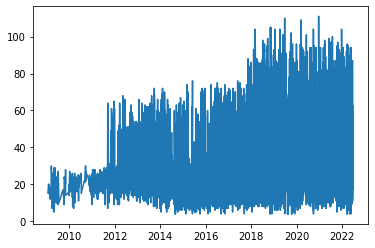

In [69]:
plt.plot(ts.Embedded_text.apply(lambda x : len(x.split())))

In [70]:
pd.DataFrame(ts.loc["2012":"2014" , "Embedded_text"].sample(10))

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


,Embedded_text
Timestamp,
2013-01-08 08:27:19+00:00,Inaugurated Global Trade Fair. I invite all to visit the Kumbh Mela of development taking place on banks of Sabarmati http://nm4.in/WH9v2h\n29\n95\n50
2014-04-30 16:56:27+00:00,"In Tirupati, urged people of Seemandhra to bless NDA with a resounding majority in the State Assembly & elect all NDA MPs to Lok Sabha.\n55\n361\n406"
2013-11-24 15:19:57+00:00,Addressed 4 public meetings across Rajasthan. Urged people to support BJP & make Vasundhara ji the CM. \n@VasundharaBJP\n35\n108\n89
2013-06-05 07:40:45+00:00,मेरा गुजरात की जनता को आभार और बधाई की उन्होंने फिर एक बार बीजेपी का साथ देकर विकास की राजनीती में अपना विश्वास व्यक्त किया है |\n67\n144\n108
2012-09-10 15:15:53+00:00,"Announced Chhota Udepur as a new and the 28th district of Gujarat to come into force from January 26, 2013 http://nm4.in/QeVkjb\n28\n130\n37"
2014-05-17 15:56:33+00:00,"I first stepped into Varanasi as a candidate but I have become a son of this land. Maa Ganga has made me yours. http://india272.com/2014/05/17/varanasi/…\n191\n1,187\n2,031"
2014-06-02 05:38:52+00:00,"Shri Tapan Sikdar will be remembered for his rich contribution in building the BJP & his years of dedicated public service.\n192\n717\n1,436"
2013-12-18 10:10:36+00:00,Passage of Lokpal Bill in Parliament is a victory of the efforts of all Indians. I congratulate all our MPs on this momentous occasion.\n91\n362\n254
2014-10-25 13:25:28+00:00,"Talked about the importance of preventive healthcare & the need to raise awareness & facilities encouraging the same.\n129\n509\n1,295"


In [71]:
lnk = ts.Embedded_text.apply(lambda x : ("www" in x or "http" in x))

In [72]:
ts["links"] = lnk

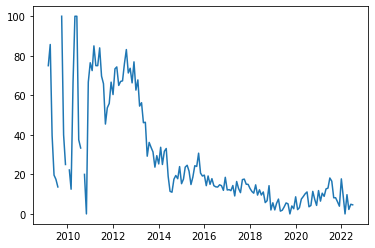

In [73]:
plt.plot(ts["links"].resample('M').mean()*100)

In [74]:
(ts["num_likes"].resample('M').count() == 0).value_counts()

False    158
True       3
Name: num_likes, dtype: int64

In [75]:
ts.head()

,Text,Embedded_text,num_comments,num_likes,num_retweets,tweet_len,links
Timestamp,,,,,,,
2009-02-04 06:34:01+00:00,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jamboree-2009. Watch live webcast at 6.00pm today on www.narendramodi.in\n9\n11\n11,9,11,11000,123,True
2009-02-01 17:55:23+00:00,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarnim Jayanti Yatra\n36\n209\n267",36,209,267000,72,False
2009-02-12 03:54:37+00:00,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendramodi.in launched with many interactive features to connect you directly with CM.\n3\n5\n5,3,5,5000,131,True
2009-02-24 09:05:37+00:00,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the development of Gujarat: Chief Minister http://tinyurl.com/b6ltru\n3\n2\n2,3,2,2000,109,True
2009-03-02 06:08:56+00:00,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Aid-Package” for the unemployed Diamond-Artisans http://tinyurl.com/cjk3vd\n1\n1\n3,1,1,3000,124,True


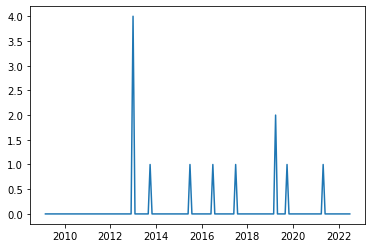

In [76]:
plt.plot(pd.DataFrame(ts.Embedded_text.apply(lambda x : "Rahul" in x)).resample('M').sum())

In [84]:
it = pd.DataFrame(ts.Embedded_text.apply(lambda x : "Rahul" in x)).resample('M').sum()

In [91]:
it[it[str(it.columns[0])] == True]

,Embedded_text
Timestamp,
2013-09-30 00:00:00+00:00,1
2015-06-30 00:00:00+00:00,1
2016-06-30 00:00:00+00:00,1
2017-06-30 00:00:00+00:00,1
2019-09-30 00:00:00+00:00,1
2021-04-30 00:00:00+00:00,1


In [97]:
for i in range(data.shape[0]):
    txt = data.iloc[i].Embedded_text
    tim = pd.to_datetime(data.iloc[i].Timestamp).year
    if "Rahul" in txt:
        print(txt , tim)

Mr. Rahul Gandhi talks of respect for Vidhan Sabha but his own attendance in Lok Sabha between May 2011-May 2012 was 24 out of 85 sittings!
121
732
155 2012
If Rahul Baba is walking on Gandhiji's path, why is Bapu's 1 wish incomplete - to disband Congress after Independence? http://nm4.in/124G2oL
71
478
165 2012
Instead of talking development, Mr. Rahul Gandhi who does not even know the names of Gujarat’s districts is teaching Gujarat history.
85
369
113 2012
Rahul Baba's hypocrisy on full show. Says only 1 voice is heard in Guj. I ask - what about the 5000 schemes named after his family?
70
501
130 2012
PM talks of happily working under Rahul Gandhi's leadership next year! Wasn't he doing the same all these years?Misleading the nation again?
786
2,036
713 2013
Wishing the Congress Vice President, Shri Rahul Gandhi a Happy Birthday. I pray for his good health & long life. @OfficeOfRG
1,099
2,689
4,408 2015
Birthday wishes to the Congress VP, Shri Rahul Gandhi. May he be blessed with a 

In [78]:
data.head()

,Timestamp,Text,Embedded_text,num_comments,num_likes,num_retweets
0,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jamboree-2009. Watch live webcast at 6.00pm today on www.narendramodi.in\n9\n11\n11,9,11,11000
1,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarnim Jayanti Yatra\n36\n209\n267",36,209,267000
2,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendramodi.in launched with many interactive features to connect you directly with CM.\n3\n5\n5,3,5,5000
3,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the development of Gujarat: Chief Minister http://tinyurl.com/b6ltru\n3\n2\n2,3,2,2000
4,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Aid-Package” for the unemployed Diamond-Artisans http://tinyurl.com/cjk3vd\n1\n1\n3,1,1,3000


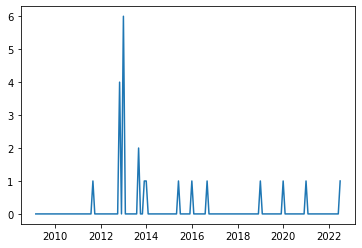

In [79]:
plt.plot(pd.DataFrame(ts.Embedded_text.apply(lambda x : "Sonia" in x)).resample('M').sum())

In [99]:
for i in range(data.shape[0]):
    txt = data.iloc[i].Embedded_text
    tim = pd.to_datetime(data.iloc[i].Timestamp).year
    if "Sonia" in txt:
        print(txt , tim)
        print("")

Have come to know through media about Mrs Sonia Gandhi’s surgery. I pray for her speedy recovery & good health.
160
165
52 2011

UPA takes credit of bringing RTI but why don’t they answer RTI queries on Mrs. Sonia Gandhi's travel for so many years
narendramodi.in
CM comes down heavily on Congress for their inability to come clear on expenditure of people’s...
CM comes down heavily on Congress for their inability to come clear on expenditure of people’s money!
106
457
118 2012

Don't mislead nation on Mrs. Sonia Gandhi's travels abroad! Spoke at a rally in Jamnagar
narendramodi.in
Don't mislead nation on Mrs. Sonia Gandhi's travels abroad!
Don't mislead nation on Mrs. Sonia Gandhi's travels abroad!
74
172
71 2012

Mrs. Sonia Gandhi came to Rajkot & spoke on many issues but was silent on issue of rising prices! My speech at Jasdan
narendramodi.in
I challenge PM to compete on development. But they want to compete on spreading lies!
I challenge PM to compete on development. But they want t

In [106]:
data.Embedded_text.sample(10)

17370                                                                                  આવતીકાલ, ૨૦ ઓગસ્ટના રોજ સવારે ૧૧ કલાકે સોમનાથ મંદિર ખાતે સમુદ્ર દર્શનપથ, જુના મંદિર પરિસરનું પુન:નિર્માણ તથા પ્રદર્શન કક્ષનું ઉદ્દઘાટન તથા શ્રી પાર્વતી મંદિરનો શિલાન્યાસ કરીશ. આ બધા પ્રકલ્પથી સોમનાથ મંદિર ખાતે માળખાકીય સુવિધાઓમાં વધારો થશે. https://pib.gov.in/PressReleseDetail.aspx?PRID=1747037…\n201\n1,507\n7,247
2018                                                                                                                                                                                                                                                    Thankful to people of Guj for the continued faith in us.Congrats to BJP Karyakartas for major win in municipality polls http://nm4.in/VROhze\n139\n222\n96
13345                                                                                              The \n@BJP4India\n is fully committed towards the development and prosperity of Assam. \n\nWe w

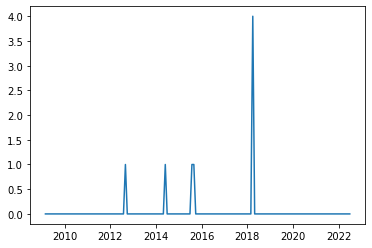

In [107]:
plt.plot(pd.DataFrame(ts.Embedded_text.apply(lambda x : "Islam" in x)).resample('M').sum())

In [108]:
for i in range(data.shape[0]):
    txt = data.iloc[i].Embedded_text
    tim = pd.to_datetime(data.iloc[i].Timestamp).year
    if "Islam" in txt:
        print(txt , tim)
        print("")

Read views of Islamic scholar Maulana Wahiduddin Khan on Assam riots. You may also like to read. Sharing the article http://nm4.in/O0iBmy
76
360
114 2012

Nawaz Sharif ji told me that he stays in Islamabad but goes to meet his Mother once in a week.
513
2,521
4,346 2014

Delighted to gift President Islam Karimov a specially commissioned reproduction of Khamsa-i-Khusrau, by Amir Khusrau.
52
630
995 2015

The delegation rightly pointed out that Islam doesn't preach hatred or extremism. Need of the hour is to marginalise forces promoting Jihad.
160
1,209
1,730 2015

Islamic culture is flourishing across India. The influence of Sufism spreads the message of love, peace and brotherhood. The Government of India is leaving no stone unturned in empowering the Muslim youth. We want them to have the Quran in one hand and a computer in the other.
3,603
7,502
33K 2018

Glad to have distinguished members of the Muslim community, scholars, spiritual leaders and others during the conference on ‘Islam

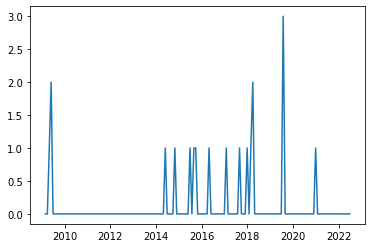

In [109]:
plt.plot(pd.DataFrame(ts.Embedded_text.apply(lambda x : "Muslim" in x)).resample('M').sum())

In [111]:
for i in range(data.shape[0]):
    txt = data.iloc[i].Embedded_text
    tim = pd.to_datetime(data.iloc[i].Timestamp).year
    if "Muslim" in txt:
        print(txt , tim)
        print("")

Reading: "‘Congress has taken Muslims for granted’" (http://twitthis.com/k76k7d)
3
21
7 2009

Despite the gloomy picture presented about Muslims in Gujarat, the Muslims of Gujarat have the maximum per capita income in the country.
12
63
31 2009

Since past 60 years, Muslims treated not as human beings but as vote banks.
Listen at www.narendramodi.in
14
94
79 2009

India is one. NDA will not work for Hindus or Muslims but for realising the dreams of the people of India http://nm4.in/1i16uZr
195
857
699 2014

Good effort by Laila Shah &her friends towards Clean India.Such efforts are a big strength for Swachh Bharat Mission!
firstpost.com
Inspired by Modi's call, she cleaned Trilokpuri's debris-India News , Firstpost
35-year-old Laila Shah wielded the broom and started collecting shards of broken glass and bricks from the narrow lanes of east Delhi's Trilokpuri area in the wake of Hindu-Muslim clashes.
155
548
1,130 2014

Met a delegation of leaders from the Muslim Community. Talked abou

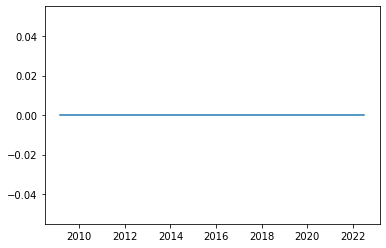

In [112]:
plt.plot(pd.DataFrame(ts.Embedded_text.apply(lambda x : "muslim" in x)).resample('M').sum())

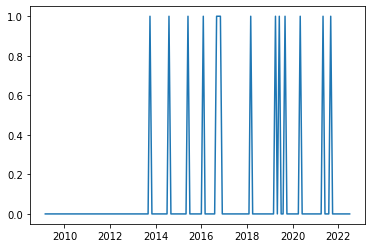

In [117]:
plt.plot(pd.DataFrame(ts.Embedded_text.apply(lambda x : "Amit " in x)).resample('M').sum())

In [129]:
count = 0
for i in range(data.shape[0]):
    txt = data.iloc[i].Embedded_text
    tim = pd.to_datetime(data.iloc[i].Timestamp).year
    if "Amit " in txt:
        print(count)
        count += 1
        print(txt , tim)
        print("")

0
Congratulations to Amit Kumar for winning silver medal in World Wrestling Championship!
1,163
477
338 2013

1
Amit Bhai started his journey as an ordinary Karyakarta & has repeatedly proven himself through tireless hardwork & determination.
294
1,033
1,383 2014

2
On popular demand, sharing 
@AmitShahOffice
 speaking at 
@aajtak
 Manthan. https://youtube.com/watch?v=RBKYwvQqSFc&feature=youtu.be&t=5m5s… &
youtube.com
Aaj Tak Manthan: Amit Shah On Year One Of Modi Government (Part 2)
At the Aaj Tak Manthan, BJP President Amit Shah spoke about the work done by the Modi government in its first year in power. Listen in to what he has to say....
395
1,649
2,123 2015

3
Amit Bhai combines grassroot-level work & rich organisational experience which will benefit the Party immensely. 
@AmitShah
269
1,330
2,967 2016

4
The #TirangaYatra in Chhindwara got a phenomenal response. Minister 
@PrakashJavdekar
 joined the Yatra.
Prakash Javadekar
@PrakashJavdekar
 · Aug 22, 2016
#Azadi70Saal Elated by

4